In [1]:
from phoenix import potentials, distributionfunctions, sampling, actions_to_phase_space
from phoenix.potentials import miyamoto_nagai_potential as Phi
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

/Users/annalena/Documents/GitHub/phoenix/phoenix/distributionfunctions.py:10: UserWarning: As of jaxtyping version 0.2.24, jaxtyping now prefers the syntax
```
from jaxtyping import jaxtyped
# Use your favourite typechecker: usually one of the two lines below.
from typeguard import typechecked as typechecker
from beartype import beartype as typechecker

@jaxtyped(typechecker=typechecker)
def foo(...):
```
and the old double-decorator syntax
```
@jaxtyped
@typechecker
def foo(...):
```
should no longer be used. (It will continue to work as it did before, but the new approach will produce more readable error messages.)
In particular note that `typechecker` must be passed via keyword argument; the following is not valid:
```
@jaxtyped(typechecker)
def foo(...):
```

  @jaxtyped
/Users/annalena/Documents/GitHub/phoenix/phoenix/distributionfunctions.py:38: UserWarning: As of jaxtyping version 0.2.24, jaxtyping now prefers the syntax
```
from jaxtyping import jaxtyped
# Use your favourite ty

In [2]:
#define parameters
params = {
    "R0": 8.0, # for actions to phase space
    "Rinit": 8.0, # for sampling
    "R0_thin": 5.0,
    "Rd_thin": 2.5,
    "Sigma0_thin": 100.0,
    "RsigR_thin": 8.0,
    "RsigZ_thin": 8.0,
    "sigmaR0_R0_thin": 40.0,
    "sigmaz0_R0_thin": 25.0,
    "L0_thin": 50.0,
    "Rinit_for_Rc_thin": 8.0,
    "R0_thick": 8.0,
    "Rd_thick": 2.0,
    "Sigma0_thick": 150.0,
    "RsigR_thick": 8.0,
    "RsigZ_thick": 4.0,
    "sigmaR0_R0_thick": 60.0,
    "sigmaz0_R0_thick": 40.0,
    "L0_thick": 50.0,
    "Rinit_for_Rc_thick": 8.0,
    "f_thin": 0.8,
    "f_thick": 0.2,
}

envelope_max = 3.0
n_candidates = 500_000
key = jax.random.PRNGKey(42)

#theta = (1e12, 20.0, 20.0)  # (M, a, b) z.B. für Miyamoto–Nagai
#theta_target = (1e12, 5.0, 2.0)  # (M, a, b) z.B. für Miyamoto–Nagai
theta = jnp.array([1e12, 20.0, 20.0])
theta_target = jnp.array([1e12, 5.0, 2.0])

In [3]:
#from parameters to phase space coordinates
def params_to_phasespace(params, theta = theta, Phi= Phi, key=key, n_candidates=n_candidates, envelope_max=envelope_max):
    candidates, samples, soft_weights = sampling.sample_df_potential(key, params, Phi, theta, n_candidates, envelope_max, tau=0.01)
    phase_space_coords = actions_to_phase_space.map_actions_to_phase_space(samples, params, key, Phi, theta)
    return phase_space_coords

In [4]:
dparams_to_phasespace = jax.jacfwd(lambda p: params_to_phasespace(p), argnums=0)(params)

In [5]:
dtheta_to_phasespace = jax.jacfwd(lambda t: params_to_phasespace(params, theta=t), argnums=0)(theta)

In [6]:
print(dparams_to_phasespace)

{'L0_thick': Array([[-0., -0., -0.,  0.,  0., -0.],
       [-0.,  0., -0.,  0., -0.,  0.],
       [ 0.,  0., -0., -0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0.,  0.,  0., -0.],
       [-0., -0.,  0.,  0., -0., -0.],
       [ 0., -0., -0.,  0.,  0.,  0.]], dtype=float32), 'L0_thin': Array([[-0., -0., -0.,  0.,  0., -0.],
       [-0.,  0., -0.,  0., -0.,  0.],
       [ 0.,  0., -0., -0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0.,  0.,  0., -0.],
       [-0., -0.,  0.,  0., -0., -0.],
       [ 0., -0., -0.,  0.,  0.,  0.]], dtype=float32), 'R0': Array([[-0.0000000e+00, -0.0000000e+00, -0.0000000e+00,  0.0000000e+00,
         0.0000000e+00, -0.0000000e+00],
       [-0.0000000e+00,  0.0000000e+00, -0.0000000e+00,  0.0000000e+00,
        -0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00, -0.0000000e+00, -0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       ...,
       [ 1.2216938e-13,  2.9911303e-13,  2.6206493e-19, -1.9521369e-09,
         7.9731760e-1

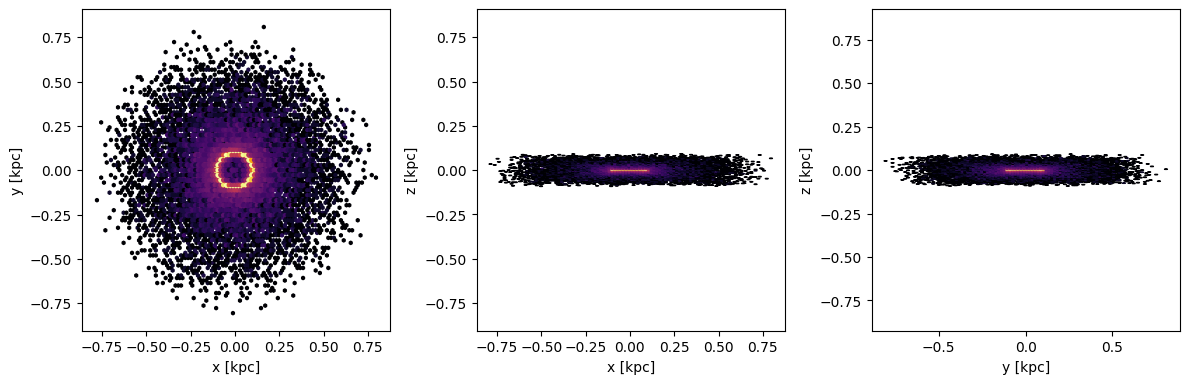

In [7]:
phase_space_coords = params_to_phasespace(params)

x = phase_space_coords[:, 0]
y = phase_space_coords[:, 1]
z = phase_space_coords[:, 2]

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.hexbin(x, y, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.axis('equal')
plt.subplot(132)
plt.hexbin(x, z, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('z [kpc]')
plt.axis('equal')
plt.subplot(133)
plt.hexbin(y, z, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('y [kpc]')
plt.ylabel('z [kpc]')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [8]:
target_phase_space_coords = params_to_phasespace(params, theta=theta_target)

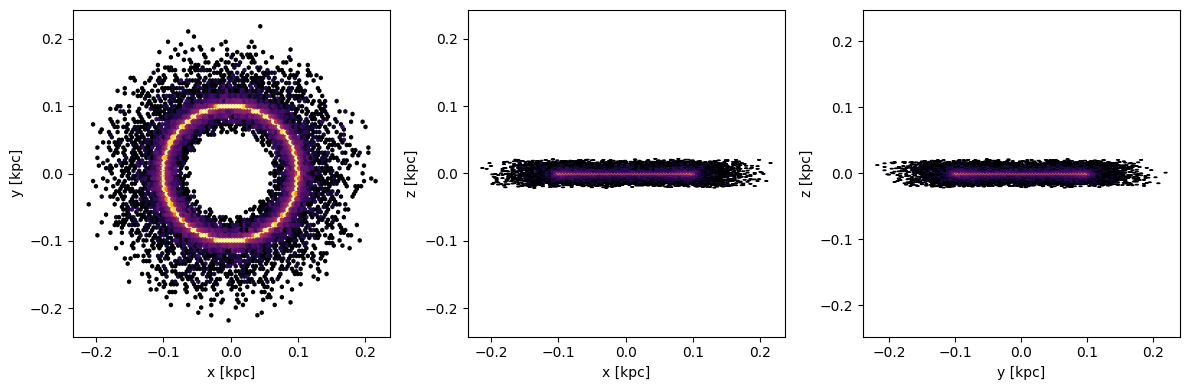

In [9]:
x_target = target_phase_space_coords[:, 0]
y_target = target_phase_space_coords[:, 1]
z_target = target_phase_space_coords[:, 2]

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.hexbin(x_target, y_target, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.axis('equal')
plt.subplot(132)
plt.hexbin(x_target, z_target, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('z [kpc]')
plt.axis('equal')
plt.subplot(133)
plt.hexbin(y_target, z_target, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('y [kpc]')
plt.ylabel('z [kpc]')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [10]:
def loss_function(params, M, a, b, theta_target=theta_target):
    #theta_source = jnp.array([theta[0], theta[1], theta[2]])
    theta = jnp.array([M, a, b])
    source_phase_space = params_to_phasespace(params, theta)
    target_phase_space = params_to_phasespace(params, theta_target)
    loss = jnp.mean((source_phase_space - target_phase_space)**2)
    return loss

In [11]:
theta_init = jnp.array([1, 20.0, 20.0])
loss = loss_function(params, theta_init[0], theta_init[1], theta_init[2])
print("Initial loss:", loss)

Initial loss: 5.4289385e+06


In [17]:
def compute_loss_and_grads(params, theta, theta_target=theta_target):
    #theta_init = jnp.array([M, a, b])
    #theta_init = {'M': M, 'a': a, 'b': b}
    #theta = {'M': theta[0], 'a': theta[1], 'b': theta[2]}
    return jax.value_and_grad(lambda t: loss_function(params, theta, theta_target))(theta)

In [13]:
loss, grads = compute_loss_and_grads(params, theta)
grads = jax.tree_util.tree_map(lambda g: jnp.clip(g, -1e3, 1e3), grads)
print("Loss:", loss)
print("Gradients:", grads)

Loss: 4.3304065e+06
Gradients: {'M': Array(nan, dtype=float32), 'a': Array(nan, dtype=float32), 'b': Array(nan, dtype=float32)}


In [14]:
import jax
import jax.numpy as jnp

# 1. Enable x64 for stability
jax.config.update("jax_enable_x64", True)

# ... define params_to_phasespace ...

def loss_function(params, theta_array, theta_target):
    # theta_array is [M, a, b]
    source_phase_space = params_to_phasespace(params, theta_array)
    target_phase_space = params_to_phasespace(params, theta_target)
    loss = jnp.mean((source_phase_space - target_phase_space)**2)
    return loss

# Setup data
# M is 1e12. Ensure we are in float64 mode or rescale M.
theta_init = jnp.array([1e12, 20.0, 20.0], dtype=jnp.float64)
theta_target = jnp.array([1.1e12, 21.0, 19.0], dtype=jnp.float64) # Example target

# 2. Use value_and_grad with argnums
# argnums=1 means "differentiate with respect to the 2nd argument (theta_array)"
grad_fn = jax.value_and_grad(loss_function, argnums=1)

loss, grads = grad_fn(params, theta_init, theta_target)

# 3. Handle Gradients (Clipping)
# Note: Gradients for M might still be tiny or huge compared to a and b
grads = jnp.clip(grads, -1e3, 1e3)

print("Loss:", loss)
print("Gradients:", grads)

Loss: 72.42522553363685
Gradients: [-1.48399041e-09  1.11221525e+02  1.11373176e+02]


In [27]:
import optax

def adam_optimizer(loss_function, params, theta_init, theta_target, learning_rate=1e-3, tol=1e-6, max_iter=3):
    #theta_init = jnp.array([M, a, b])
    #theta = theta_init
    #optimizers = {'M': optax.adam(learning_rate), 'a': optax.adam(learning_rate), 'b': optax.adam(learning_rate)}
    #theta_labels = {'M': 'M', 'a': 'a', 'b': 'b'}
    #theta_init = {"M": M, "a": a, "b": b}
    #theta_target = {"M": theta_target[0], "a": theta_target[1], "b": theta_target[2]}

    #optimiter = optax.multi_transform(optimizers, theta_labels)
    #optimizer_state = optimiter.init(theta_init)
    optimizer = optax.adam(learning_rate)
    optimizer_state = optimizer.init(theta_init)

    theta = theta_init

    theta_history = []
    loss_history = []

    for i in range(max_iter):
        #loss, grads = jax.value_and_grad(lambda t: loss_function(params, t['M'], t['a'], t['b'], theta_target))(theta_init)
        #loss, grads = compute_loss_and_grads(params, theta_init['M'], theta_init['a'], theta_init['b'], theta_target=theta_target)
        #loss, grads = compute_loss_and_grads(params, theta, theta_target)
        #grads = jax.tree_util.tree_map(lambda g: jnp.clip(g, -1e3, 1e3), grads)
        grad_fn = jax.value_and_grad(loss_function, argnums=1)

        loss, grads = grad_fn(params, theta, theta_target)
        grads = jnp.clip(grads, -1e3, 1e3)

        loss_history.append(loss)
        theta_history.append(theta)
        print("Gradients:", grads)
        print("Loss:", loss)
        updates, optimizer_state = optimizer.update(grads, optimizer_state)
        print("Updates:", updates)
        theta = optax.apply_updates(theta, updates)
        print(f"Iteration {i}: Loss = {loss}, Theta = {theta}")

        if optax.global_norm(updates) < tol:
            print(f"Converged at iteration {i}")
            break
    
    return theta_init, loss, theta_history, loss_history

In [ ]:
#theta_init = {'M': 1e12, 'a': 20.0, 'b': 20.0}
theta_init = jnp.array([1e12, 20.0, 20.0])
theta_target = jnp.array([1e12, 21.0, 19.0])
theta_optimized, final_loss, theta_history, loss_history = adam_optimizer(loss_function, params, theta_init, theta_target)

Gradients: [-1.04858837e-12  5.24241748e-02  1.04850132e-01]
Loss: 0.027064156058315234
Updates: [ 1.04847842e-07 -9.99999809e-04 -9.99999905e-04]
Iteration 0: Loss = 0.027064156058315234, Theta = [1.0000e+12 1.9999e+01 1.9999e+01]
Gradients: [ 1.23353072e-12 -1.18662528e-01 -6.63843306e-02]
Loss: 0.02707803194624062
Updates: [-1.52509480e-08  4.10059734e-04 -1.67842270e-04]
Iteration 1: Loss = 0.02707803194624062, Theta = [1.00000000e+12 1.99994101e+01 1.99988322e+01]


In [20]:
print(theta_history)

[Array([1.e+12, 2.e+01, 2.e+01], dtype=float64)]


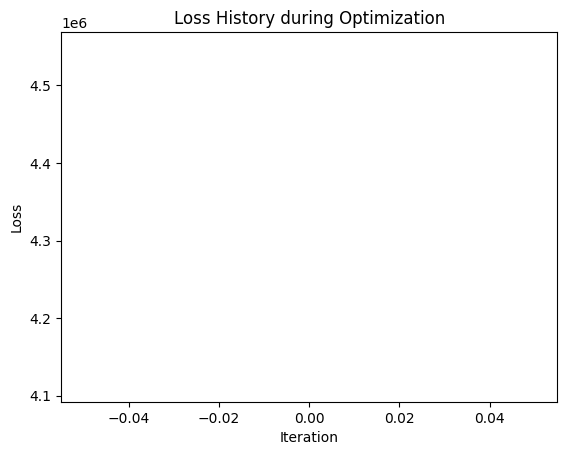

In [ ]:
plt.figure()
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss History during Optimization')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Extract M, a, and b from theta_history
M_history = [float(theta['M']) for theta in theta_history]
a_history = [float(theta['a']) for theta in theta_history]
b_history = [float(theta['b']) for theta in theta_history]

# Create subplots
plt.figure(figsize=(12, 4))

# Plot M
plt.subplot(1, 3, 1)
plt.plot(M_history, label='M')
plt.xlabel('Iteration')
plt.ylabel('M')
plt.title('M History')
plt.axhline(y=theta_target[0], color='red', linestyle='--', label='Target M')
plt.grid()

# Plot a
plt.subplot(1, 3, 2)
plt.plot(a_history, label='a', color='orange')
plt.xlabel('Iteration')
plt.ylabel('a')
plt.title('a History')
plt.axhline(y=theta_target[1], color='red', linestyle='--', label='Target a')
plt.grid()

# Plot b
plt.subplot(1, 3, 3)
plt.plot(b_history, label='b', color='green')
plt.xlabel('Iteration')
plt.ylabel('b')
plt.title('b History')
plt.axhline(y=theta_target[2], color='red', linestyle='--', label='Target b')
plt.grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


TypeError: JAX does not support string indexing; got idx=('M',)

In [ ]:
# Extract target phase space coordinates
x_target = target_phase_space_coords[:, 0]
y_target = target_phase_space_coords[:, 1]
z_target = target_phase_space_coords[:, 2]

# Extract optimized phase space coordinates
optimized_phase_space_coords = params_to_phasespace(params, theta=theta_optimized)
x_optimized = optimized_phase_space_coords[:, 0]
y_optimized = optimized_phase_space_coords[:, 1]
z_optimized = optimized_phase_space_coords[:, 2]

# Compute differences
x_diff = x_target - x_optimized
y_diff = y_target - y_optimized
z_diff = z_target - z_optimized

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

# First row: Target
plt.subplot(3, 3, 1)
plt.hexbin(x_target, y_target, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.title('Target: x vs y')
plt.axis('equal')

plt.subplot(3, 3, 2)
plt.hexbin(x_target, z_target, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('z [kpc]')
plt.title('Target: x vs z')
plt.axis('equal')

plt.subplot(3, 3, 3)
plt.hexbin(y_target, z_target, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('y [kpc]')
plt.ylabel('z [kpc]')
plt.title('Target: y vs z')
plt.axis('equal')

# Second row: Optimized
plt.subplot(3, 3, 4)
plt.hexbin(x_optimized, y_optimized, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.title('Optimized: x vs y')
plt.axis('equal')

plt.subplot(3, 3, 5)
plt.hexbin(x_optimized, z_optimized, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('z [kpc]')
plt.title('Optimized: x vs z')
plt.axis('equal')

plt.subplot(3, 3, 6)
plt.hexbin(y_optimized, z_optimized, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('y [kpc]')
plt.ylabel('z [kpc]')
plt.title('Optimized: y vs z')
plt.axis('equal')

# Third row: Difference
plt.subplot(3, 3, 7)
plt.hexbin(x_diff, y_diff, gridsize=100, cmap='coolwarm', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.title('Difference: x vs y')
plt.axis('equal')

plt.subplot(3, 3, 8)
plt.hexbin(x_diff, z_diff, gridsize=100, cmap='coolwarm', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('z [kpc]')
plt.title('Difference: x vs z')
plt.axis('equal')

plt.subplot(3, 3, 9)
plt.hexbin(y_diff, z_diff, gridsize=100, cmap='coolwarm', bins='log')
plt.xlabel('y [kpc]')
plt.ylabel('z [kpc]')
plt.title('Difference: y vs z')
plt.axis('equal')

plt.tight_layout()
plt.show()

TypeError: Value 'M' with dtype <U1 is not a valid JAX array type. Only arrays of numeric types are supported by JAX.